# HW5 (Part 1) and HW6 (Part 2) - By: Divyesh Harit

# Vast Challenge - 2011, Mini Challenge 1 - Characterization of an Epidemic Spread
<br>
Goal - A major epidemic has started in the city of Vastopolis. The task is to analyze the data and determine how the epidemic is being spread and whether or not it is contained. The origin of the epidemic must also be identified.
Dataset - Microblogging messages with geolocations and a map

## Algorithms

Get word counts, TF-IDF features for tweets - Will help in clustering alogrithms and also in visualization
<br>
**Clustering** - <br>
    **Based on Location** - To see location where people are more active or totally inactive (if active then we can see what kind of message were coming in, whether epidemic is being spread or is contained, how are people reacting)
<br>
    **Based on Date/Time** - Will give a sense or a trend of how messages were changing with time (it could be either change in count or change in the context)<br>
    **Based on Messages** - Will help in grouping messages<br><br>
These 3 clustering results should give a good picture of the epidemic spread. We should be able to answer questions like how it started, how it is spreading, all affected aread and whether it is contained or not. <br>
<br>
**Classification** -<br>
    Messages - Classifying messages into related to epidemic/disease and non-related will help in visualizing the results better. Infact, we can even run the clustering algorithms on the messages related to disease/epidemic. 

## Similar Dataset
We decided to go with US twitter dataset present here - http://www.followthehashtag.com/datasets/free-twitter-dataset-usa-200000-free-usa-tweets/
It has 200k tweets with geolocations, date and time. We selected this set as it was a close match with our mini challenge dataset.

# Classification
We didn't run any classification algorithm on this. Instead,we looked at the dataset and decided to select rows where tweet had the word "#earthquake" and decided to do clustering on that to get a pattern. 

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import bokeh
from bokeh.charts import Scatter
from bokeh.io import output_notebook,output_file
from bokeh.layouts import layout
from bokeh.models import Label
from bokeh.plotting import figure, show
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", UserWarning)
output_notebook()

/root/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


Loading BokehJS ...

In [2]:
# read data and select #earthquake related tweets
df = pd.read_excel('tweets1.xlsx')
df = df[['Tweet content','Latitude','Longitude', 'Date', 'Hour']]
data = df.loc[df['Tweet content'].str.contains("#earthquake")]

In [3]:
## word count, tf-idf features
###it is included in clustering by tweet content, there we first get word, count and tf-idf features

# Clustering

## By Location

In [4]:
##Clustering by location
k_means = cluster.KMeans(6)
latlong = data.as_matrix(columns=['Latitude', 'Longitude'])
k_means.fit(latlong)
data['cluster'] = k_means.labels_
#plot = figure(width=550, height=550, title='K-means, 8 clusters', x_axis_label = "Grocery", y_axis_label = "Delicassen")
#plot.scatter(latlong[])

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
colors = np.array([x for x in ('#00f', '#0f0', '#f00', '#0ff', '#f0f', '#ff0')])
plot = figure(width=550, height=550, title='Clustering Tweets by Location', x_axis_label = "Latitude", y_axis_label = "Longitude")
plot.scatter(latlong[:,0],latlong[:,1], color = colors[k_means.labels_].tolist())
show(plot)

# By Tweets
<br>
We clustered tweets by bag of words and used PCA to transform the data and visualize it in 2d. 

In [6]:
##Clustering by bag of words
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(data["Tweet content"].tolist()).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

In [7]:
kmeans = cluster.KMeans(6)
kmeans.fit(X)
plot = figure(width=550, height=550, title='Clustering By Tweets')
plot.scatter(data2D[:,0], data2D[:,1],color=colors[k_means.labels_].tolist())
show(plot) 

# By Date/Time
<br> The similar dataset didnt have tweets from very different times so we can just group the tweets by time and date. 

/root/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


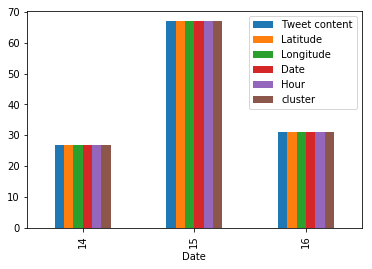

In [8]:
data["Date"] = data["Date"].astype("datetime64")
%matplotlib inline
data.groupby(data["Date"].dt.day).count().plot(kind="bar")

# Algorithms on Mini Challenge
<br> We will have to implement a classification algo or use word-count/tf-idf features (output these out from clustering by tweets code) to classify tweets into related and non-related. Clustering should work well. We might have to try different clustering algorithms and then select the best. 

# Visualizations

<br> Here, we will now further explore our dataset and already chosen algorithms using interactive visualizations.

# Interactive location clustering

In [9]:
#assign a color to each label
def get_colors(labels):
    colors=[]
    for i in labels:
        if i==0.0 or i==0:
            colors.append('red')
        if i==1.0 or i==1:
            colors.append('#CAB2D6')
        if i==2.0 or i==2:
            colors.append('blue')
        if i==3.0 or i==3:
            colors.append('green')
        if i==4.0 or i==4:
            colors.append('black')
        if i==5.0 or i==5:
            colors.append('brown')
        if i==6.0 or i==6:
            colors.append('gray')
        if i==7.0 or i==7:
            colors.append('navy')
        if i==8.0 or i==8:
            colors.append('orange')
        if i==9.0 or i==9:
            colors.append('olive')
    return colors

In [10]:
from bokeh.io import push_notebook, show
from bokeh.layouts import widgetbox, row, column, layout
from bokeh.models import CustomJS, Select, Slider
from bokeh.models import ColumnDataSource, HoverTool, Legend, BoxZoomTool, ResetTool, LassoSelectTool, WheelZoomTool, PanTool

#Cluster
def clustering(number_of_clusters):
    kmeans = cluster.KMeans(n_clusters=number_of_clusters)
    return kmeans

#Initial, default clustering
clf = clustering(6)
clf.fit(latlong)
labels = clf.labels_
colors = get_colors(labels)

#Initial, default plot
source = ColumnDataSource(data=dict(x=latlong[:,0], y=latlong[:,1], colors=colors))
plot = figure(width=550, height=450, title='Clustering By Tweets', x_axis_label = "Latitude", y_axis_label = "Longitude",
              tools = [PanTool(), BoxZoomTool(), ResetTool(), LassoSelectTool(), WheelZoomTool()])
plot.circle('x','y', fill_color='colors', line_color='colors', source=source)


GlyphRenderer(id='afeb2205-e713-42d2-8a3a-6271487cec2f', ...)

In [11]:
def update_clusters(value):
    clusters = value
    clf = clustering(clusters)
    clf.fit(latlong)
    labels = clf.labels_ 
    colors = get_colors(labels)
    source.data=dict(x=latlong[:,0], y=latlong[:,1], colors=colors)
    push_notebook(handle=bokeh_handle)

callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "update_clusters(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")
    
#Slider to change clusters
slider = Slider(title="Number of clusters", value=6, start=2, end=10, step=1, width=200,
                callback=callback)

bokeh_handle = show(column(slider, plot), notebook_handle=True)

The above interactive graph allows us to create clusters of different sizes according to their location, i.e, latitude and longitude. This allows us to group tweets according to the different locations that they originated from.
We can apply something similar to the VAST Challenge, by first filtering tweets based on Epidemic or Disease related tweets, then clustering them by location, then finally digging deeper into the individual regions.

# Interactive Tweet Clustering

In [12]:
x = data2D[:,0]
y = data2D[:,1]

s1 = ColumnDataSource(data=dict(x=x, y=y))
p1 = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Tweets: Select Here")
p1.scatter('x', 'y', source=s1, alpha=0.6, color=get_colors(k_means.labels_))

s2 = ColumnDataSource(data=dict(x=[], y=[]))
p2 = figure(plot_width=400, plot_height=400, x_range=(-0.3, 0.62), y_range=(-0.28, 0.45),
            tools="", title="Tweets: Watch Here")
p2.scatter('x', 'y', source=s2, alpha=0.6, color=get_colors(k_means.labels_))

s1.callback = CustomJS(args=dict(s2=s2), code="""
        var inds = cb_obj.selected['1d'].indices;
        var d1 = cb_obj.data;
        var d2 = s2.data;
        d2['x'] = []
        d2['y'] = []
        for (i = 0; i < inds.length; i++) {
            d2['x'].push(d1['x'][inds[i]])
            d2['y'].push(d1['y'][inds[i]])
        }
        s2.change.emit();
    """)

layout = row(p1, p2)

show(layout)

Here, we have filtered tweets on "#earthquake" basis, clustered using bag of words and then represented them in 2D after doing PCA dimensionality reduction. I'm honestly not sure if the results here helped again any more insights. The number of tweets are reduced to something far less than what's needed to gain any insights from, even with an interactive lasso select to highlight the selection.
So we'd probably not use this approach for the VAST challenge. Maybe not filtering the tweets by any hashtags - simply doing PCA on the entire tweets column, plotting in 2D and doing the lasso select might help us gain some more information on the VAST challenge dataset.